In [42]:
# Load our libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [43]:
# Load our Data
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [44]:
# Split our data
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [45]:

# Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Train the model on the data
clf.fit(X_train, Y_train)

# Predict labels of unseen (test) data
y_pred = clf.predict(X_test)

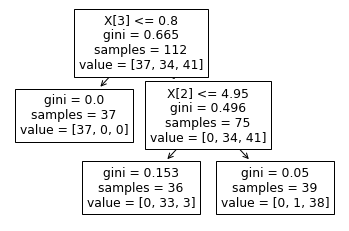

In [46]:
tree.plot_tree(clf);

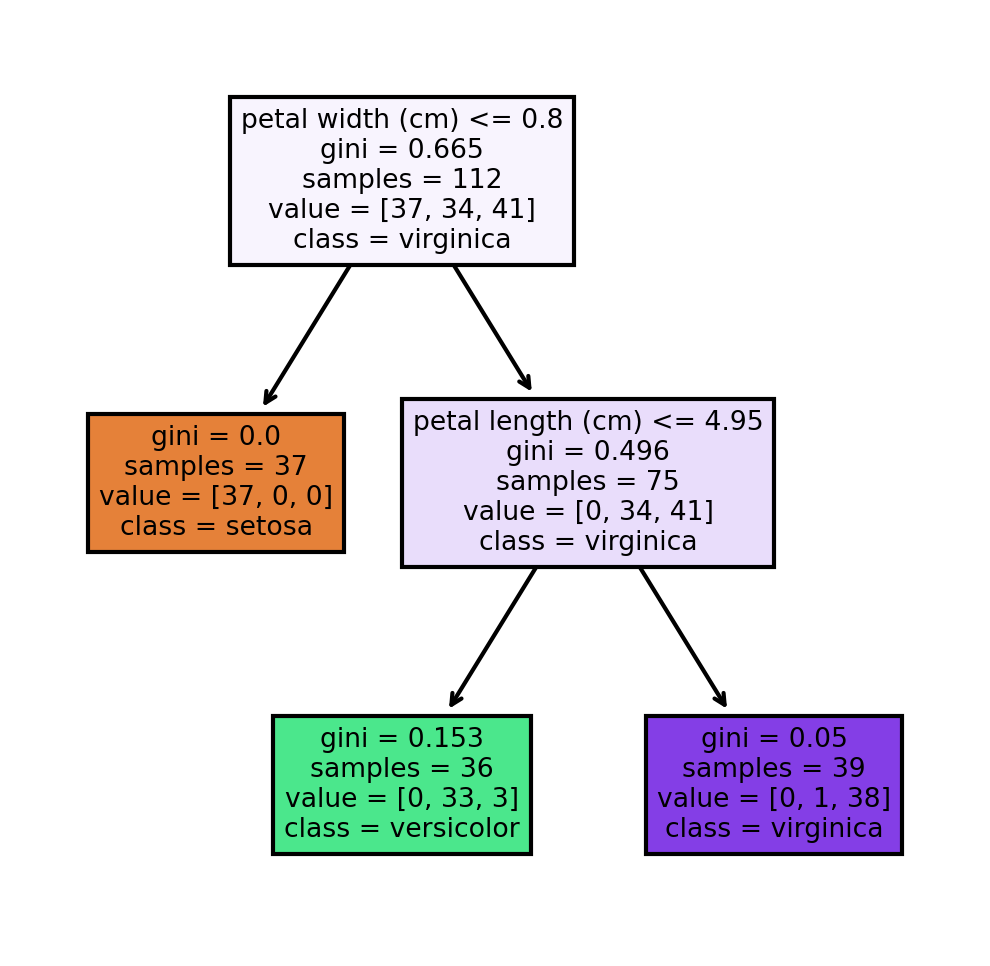

In [47]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

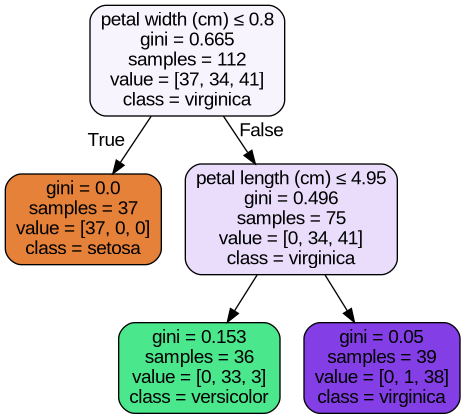

In [48]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = fn,class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('graph.png')
Image(graph.create_png())

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print("Accuracy: ",accuracy_score(Y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38

Accuracy:  0.8947368421052632
